# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


## <font color="darkorange"> Note teoriche
### Ensemble canonico

La descrizione tramite ensamble è utile per rappresentare sistemi in condizioni sperimentali ideali, ipotizzando costanti alcune variabili estensive. Un sistema isolato in cui il numero di particelle $N$, il volume $V$ e l’energia $E$ si mantengono costanti è descritto dall'ensemble microcanonico.

Si supponga ora di voler descrivere un sistema in cui siano mantenuti costanti, oltre a $N$ e $V$, anche la temperatura $T$. Questo si può ottenere ponendo il sistema in contatto termico con un bagno termico, molto più esteso del sistema stesso, caratterizzato da numero di particelle $N_b \gg N$, volume $V_b \gg V$ ed energia $E_b \gg E$,  e descritto da Hamiltoniana $H_b(q_b, p_b)$. Si supponga che le particelle siano indistinguibili.

Il sistema e il bagno possono liberamente scambiarsi energia. All’equilibrio, entrambi avranno la stessa temperatura $T$ (il bagno è così grande che la sua temperatura non varia nel processo). Il sistema sarà così descritto dalla terna $(N, V, T)$ costante: tale configurazione prende il nome di **ensemble canonico**.

Il sistema totale ($\text{sistema} + \text{bagno}$), di energia complessiva $E_{\text{tot}} = E + E_b$, è descritto tramite ensemble microcanonico: tutti gli stati compatibili con $E_{\text{tot}}$ sono equiprobabili.

La probabilità che il sistema si trovi in un microstato $(q, p)$ con energia $E = H(q, p)$ è proporzionale al numero di stati accessibili al bagno con energia $E_b = E_{\text{tot}} - E$ (siccome gli stati accessibili al sistema totale sono tutti equiprobabili, la probabilità che il sistema si trovi in un certo stato ad energia $E$ sarà tanto maggiore tanto più alto il numero di miscrostati $\Omega_b(E_{\text{tot}} - E)$ in cui il bagno si può trovare quando gli rimane un'energia $E_b$):

$$
\rho(q,p) \propto \Omega_b(E_{\text{tot}} - E)
$$

Espandendo l’entropia del bagno in serie di Taylor (per $E \ll E_{\text{tot}}$):

$$
S_b(E_{\text{tot}} - E) = k_B \ln \Omega_b(E_{\text{tot}} - E) \approx S_b(E_{\text{tot}}) - \frac{E}{T}
$$

Confrontando le due relazioni trovate si ottiene la relazione:

$$
\rho(q, p) \propto e^{-H(q, p)/k_B T}
$$

dove la costante di proporzionalità si ottiene calcolando la normalizzazione della densità di probabilità:

$$
\int \rho(q, p) \, dq \, dp = 1
$$

Tale costante di normalizzazione prende il nome di **funzione di partizione**:

$$
Z = \frac{1}{h^{3N} N!} \int d^{3N}q \, d^{3N}p \; e^{-H(q,p)/k_B T} \quad \Rightarrow \quad \rho(q, p) = \frac{1}{Z} e^{-H(q, p)/k_B T}
$$

Il termine $e^{-H(q,p)/k_B T}$ è detto **peso di Boltzmann**: indica quanto uno stato compatibile con la temperatura $T$ sia probabile all’equilibrio. Infatti, le configurazioni osservate non sono tutte quelle possibili, ma solo quelle compatibili con le fluttuazioni termiche.

I fattori correttivi sono:

- $\frac{1}{h^{3N}}$, che rende la funzione di partizione adimensionale;
- $\frac{1}{N!}$, che evita di contare più volte stati identici ottenuti permutando particelle indistinguibili.

A rigore, l'integrale che compare nel calcolo della funzione di partizione andrebbe esteso alla sola regione $E \leq E_{tot}$. Tuttavia, nel limite termodinamico ($N \to \infty$, $V \to \infty$, con densità $N/V$ finita), la funzione di partizione è dominata da stati con energia prossima all'energia media del sistema $\langle E \rangle$, mentre gli altri contributi risultano trascurabili.

Infatti, si può dimostare che la funzione di partizione si può scrivere come:

$$
Z = \int g(E) \, e^{-\beta E} \, dE
$$

dove $g(E)$ è la densità degli stati con energia $E$ (cioè, il numero di stati con energia compresa tra $E$ e $E+dE$). Ma allora:
- se $E << \langle E \rangle$ la densità è prossima a zero, perchè le configurazioni accessibili al sistema a bassa energia sono poche;
- se $E >> \langle E \rangle$ il termine esponenziale decade molto rapidamente.
 
Dunque, essendo tali contributi alla funzione di partizone trascurabili, si può estendere l'integrale su tutto lo spazio delle fasi.

Infine, dalla funzione di partizione si può ricavare l’**energia libera di Helmholtz**:

$$
A(N, V, T) = -k_B T \ln Z
$$

e da questa ottenere la **media di una generica osservabile** $f(q,p)$:

$$
\langle f \rangle = \frac{1}{Z} \frac{1}{h^{3N} N!} \int d^{3N}q \, d^{3N}p \; f(q, p) \, e^{-H(q, p)/k_B T}
$$

cioè, dalla forma della funzione di partizione e dell'energia libera, è possibile descrivere la **termodinamica del sistema**.

---

### Algoritmo di Metropolis per l'ensemble canonico

Nell’ensemble canonico si vorrebbe:

1. calcolare la funzione di partizione $Z$ a partire da $H(q, p)$; 
2. ricavare l’energia libera $A(N, V, T) = -k_B T \ln Z$;
3. ottenere dall'energia libera tutte le altre variabili termodinamiche.

Tuttavia, il calcolo diretto di $Z$ è generalmente impossibile per sistemi reali, per via dell’elevata dimensionalità dello spazio delle fasi. Per ovviare a questo problema, è possibile usare l'algoritmo di Metropolis, che consente di campionare configurazioni $\mu$ distribuite secondo la densità di probabilità canonica $\rho(\mu) \propto e^{-\beta H(\mu)}$ senza dover necessariamente conoscere la funzione di partizione $Z$.

L’algoritmo segue il funzionamento già illustrato nell'Esercitazione 5:

1. si inizializza il sistema in una configurazione arbitraria $\mu = \mu_0$;
2. si sceglie una probabilità di transizione simmetrica: $T(\mu|\mu') = T(\mu'|\mu)$;
3. si propone una nuova configurazione $\mu' \sim T(\mu'|\mu_n)$, dove $\mu_n$ è lo stato all'iterazione $n$-esima dell'algoritmo;
4. si calcola la variazione di energia $\Delta E = E(\mu') - E(\mu)$:
    - se $\Delta E \leq 0$, la mossa è sempre accettata (una configurazione ad energia minore è sempre più probabile di una ad energia maggiore); 
    - se $\Delta E > 0$, la mossa è accettata con probabilità $e^{-\beta \Delta E}$: si genera un numero casuale $r$ in $[0, 1)$ e se $r < \frac{\rho(\mu')}{\rho(\mu_n)}$, la mossa è accettata.
      
5. se la mossa è accettata, si aggiorna $\mu_{n+1} = \mu'$, altrimenti si mantiene $\mu_{n+1} = \mu_n$.

Dopo un numero sufficiente di iterazioni, le configurazioni generate sono distribuite secondo:

$$
\rho(\mu) = \frac{1}{Z} e^{-\beta H(\mu)}
$$

e si può stimare il valore delle osservabili termodinamiche come media sui campioni generati.

---

### Modello di Ising 1D
Il **modello di Ising** (caso 1D) è uno schema molto semplice usato per studiare magnetismo in un sistema complesso. É molto utile per studiare sistemi ferromagnetici ed anti-ferromagnetici. I primi, anche in assenza di un campo magnetico esterno, sono caratterizzati dall'allineamento dei momenti magnetici nella medesima direzione, e dunque da una magnetizzazione permanente. Nei secondi invece, gli spin tendono ad antiallinearsi, il che si traduce in una magnetizzazione macroscopica nulla.

Il modello definisce un reticolo di $N$ posizioni con uno spin (o un dipolo magnetico) $s_i$ in ogni sito $i$. Se ci si pone in 1D, si tratta fondamentalmente di una catena di spin. Si assumano gli spin siano variabili scalari che possono assumere valori:

$$
s_i = +1 \quad \text{o} \quad s_i = -1
$$

cioè, rappresentino dipoli unitari che puntano verso l'alto o verso il basso. Gli spin possano interagire tra loro, nell'approssimazione di interazioni tra spin tutte della **stessa intensità** che avvengono **solo tra primi vicini**. L'Hamiltoniana di interazione del sistema è:

$$
H = -J \sum_{\langle i,j \rangle} s_i s_j - h \sum_i s_i
$$
dove:
- $J$ è l'intensità dell'interazione tra spin vicini, e in particolare descrive la tendenza degli spin ad allinearsi o anti-allinarsi grazie ad un'interazione di scambio;
- $h$ è un'eventuale campo magnetico esterno;
- $\langle i,j \rangle$ sono le coppie di spin vicini.

In assenza di campo esterno, se $J>0$, allora, al fine di minimizzare l'energia del sistema, gli spin vicini tendono ad allinearsi, per cui si avranno due possibili configurazioni ($\uparrow \uparrow$ oppure $\downarrow \downarrow$). In tal caso il materiale è descrivibile secondo **modello ferromagnetico**. Al contrario, se $J<0$, le coppie di spin vicini tendono ad anti-allinearsi, mostrando un comportamento **anti-ferromagnetico**. Se invece è presente il campo esterno $h$, gli spin tenderanno ad allinearsi nella direzione del campo. Il ground state del sistema, in assenza di campo, corrisponderà allo stato in cui tutti gli spin sono allineati (in direzione $\uparrow$ o $\downarrow$). Se invece viene introdotto il campo, lo stato fondamentale risulta non degenere, essendo favorita la configurazione di spin tutti allineati, ed allineati con il campo. 

---

### Studio del modello di Ising usando l'algoritmo di Metropolis

Il modello di Ising può essere studiato utilizzando l'algoritmo di Metropolis per campionare il peso di di Boltzmann. Nel sistema di Ising, uno stato corrisponde a una configurazione possibile di spin. Avendo $N$ siti, ci sono $2^N$ stati possibili, ciascuno rappresentato da un vettore di interi le cui componenti assumono valori $+1$ o $-1$, a seconda dell'orientamento dello spin.

La funzione di partizione per un sistema di questo tipo è definita come:

$$
Z = \sum_{\{s_i\}} e^{\beta J \sum_{\langle i,j \rangle} s_i s_j + \beta h \sum_i s_i}
$$

dove la somma corre su tutte le configurazioni possibili.  
La probabilità di osservare il sistema in una particolare configurazione $\mu$ è:

$$
\rho(\mu) = \frac{1}{Z} e^{-\beta E_\mu}
$$

Per rendere il sistema traslazionalmente invariante (e per approssimare un sistema infinito), si applicano **condizioni periodiche al contorno**: la catena lineare di spin viene chiusa ad anello, così che ogni spin abbia lo stesso numero di primi vicini.

La simulazione segue la logica dell'algoritmo di Metropolis descritta sopra:
1. si sceglie una configurazione iniziale $\mu = \mu_0$. Di solito, si sceglie quella che corrisponde a temperatura $T = 0$, in cui tutti gli spin risultano allineati, oppure a $T \rightarrow \infty$, in cui gli spin risultano orientati in maniera casuale (l'energia termica domina quella di scambio);

2. si propone una mossa $\nu$: si seleziona in maniera casuale uno spin $k$ da ruotare (da $+1$ a $-1$ o viceversa) con probabilità di transizione $T(\mu|\nu) = T(\nu|\mu)$ simmetrica;

3. poichè si ha interazione solo tra i primi vicini, la variazione di energia tra la configurazione finale ed iniziale dipende solo dallo spin $s_k$ e dai primi vicini. Si può dimostare che questa vale:
$$
E_\nu - E_\mu = 2J s_k \sum_{\text{n.n. } i} s_i
$$

Se $E_\nu - E_\mu$, l'algoritmo accetta sempre. Se $E_\nu - E_\mu$ , si accetta la mossa con probabilità $A(\nu|\mu) = e^{-\beta \Delta E}$: si genera un numero casuale $r$ in $[0, 1)$ e se $r < A(\nu|\mu)$, la mossa è accetta;

5. se la mossa è accettata, allora $\nu$ diventa la nuova configurazione del sistema, altrimenti si mantiene quella precedente $\mu$.

Dopo un numero elevato di steps, il sistema si sarà evoluto verso la distribuzione di equilibrio:
$$
\rho(\mu) = \frac{1}{Z} e^{-\beta H(\mu)}
$$

---
### Studio del modello di Isign usando l'algoritmo di Gibbs
Un altro metodo per simulare il modello di Ising è il **campionamento di Gibbs**, che aggiorna ciascuno spin in base alla sua probabilità condizionata, data la configurazione dei suoi vicini.
La struttura è smile a quella dell'algortmo di Metropolis, ma in questo caso la mossa viene sempre accettata. I passi dell'algoritmo sono i seguenti:
1. si imposta una configurazione iniziale arbitraria degli spin;

2. si sceglie uno spin $s_i$, in ordine sequenziale o casuale, e si calcola il campo locale, generato dai primi vicini:
$$
h_i^{\text{eff}} = J \sum_{j \in \text{n.n.}(i)} s_j + h
$$

3. si calcola la probabilità condizionata che $s_i = +1$:
$$
P(s_i = +1 \mid s_j : j \neq i) = \frac{1}{1 + e^{-2\beta h_i^{\text{eff}}}}
$$

4. si estrae un numero casuale $r \in [0, 1)$ e si aggiorna $s_i$:
- $s_i = +1$ se $r < P(s_i = +1)$
- $s_i = -1$ altrimenti

Anche se il campionamento di Gibbs non utilizza direttamente il peso di Boltzmann, la convergenza alla distribuzione canonica è garantita.

---

### Exercise 06.1

In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

---

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with <span style="color:blue">both sampling methods, Metropolis and Gibbs</span>.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

### *Esercizio 06.1 - Soluzione proposta*
L’esercizio proposto ha l’obiettivo di calcolare il valore medio di diverse osservabili termodinamiche per un sistema magnetico descritto dal modello di Ising, utilizzando due approcci distinti: il campionamento secondo il peso di Boltzmann tramite l’algoritmo di Metropolis, e il campionamento condizionato tramite l’algoritmo di Gibbs. 

Come già fatto nell’Esercitazione 5, per entrambi i metodi di campionamento è prevista una fase iniziale di equilibrazione, necessaria per portare il sistema verso una configurazione compatibile con la distribuzione di probabilità desiderata.

Sono stati eseguiti $M = 10^4$ passi di Metropolis o Gibbs, suddivisi in altrettanti blocchi da singolo passo, al fine di monitorare l’evoluzione dell’energia potenziale (unica forma di energia considerata, in quanto non viene simulata la dinamica del sistema). Tale energia è calcolata in accordo con la forma dell’Hamiltoniana del modello di Ising. Una volta che l’energia si stabilizza, si può ritenere che il sistema abbia raggiunto l’equilibrio termodinamico.

Per rendere questa procedura automatica, è stato aggiunto un membro dati `_therma` nella classe `System`, che consente all’utente di attivare o meno il test di termalizzazione.

Di seguito si riporta un esempio del grafico di monitoraggio dell’energia potenziale. Si osserva che:
- nel caso dell’algoritmo di Metropolis, il sistema raggiunge l’equilibrio dopo circa $N_{eq} = 6000$ passi;
- nel caso dell’algoritmo di Gibbs, l’equilibrio viene raggiunto dopo circa $N_{eq} = 4000$ passi.

Questo comportamento è coerente con la natura dei due algoritmi: il Gibbs sampling aggiorna direttamente gli spin in base alla distribuzione condizionata, rendendolo generalmente più rapido nel convergere all’equilibrio, soprattutto a temperature moderate.

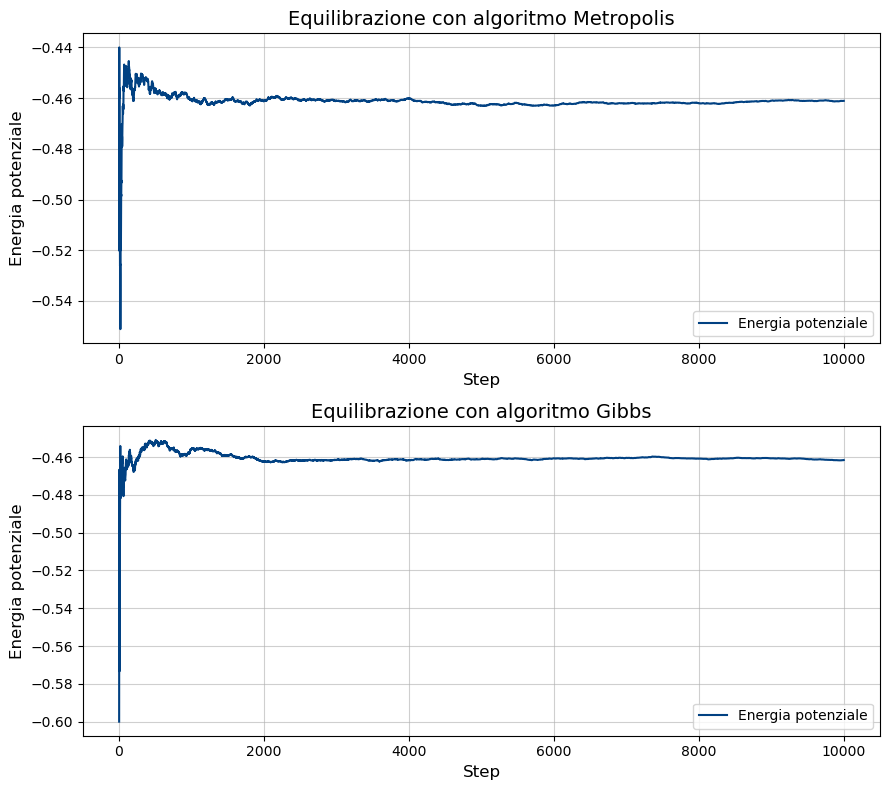

In [49]:
import numpy as np
import matplotlib.pyplot as plt

file_path_metro = 'OUTPUT_PLOT/METRO/total_energy_eq.dat'
data_metro = np.loadtxt(file_path_metro, skiprows=1)
x_metro = np.arange(1, len(data_metro) + 1)    
y_metro = data_metro[:, 2]

file_path_gibbs = 'OUTPUT_PLOT/GIBBS/total_energy_eq.dat'
data_gibbs = np.loadtxt(file_path_gibbs, skiprows=1)
x_gibbs = np.arange(1, len(data_gibbs) + 1)    
y_gibbs = data_gibbs[:, 2]

fig, axs = plt.subplots(2, 1, figsize=(9, 8))

axs[0].plot(x_metro, y_metro, linestyle='-', color='xkcd:darkish blue', label = "Energia potenziale")
axs[0].set_xlabel('Step', fontsize=12)
axs[0].set_ylabel('Energia potenziale', fontsize=12)
axs[0].set_title("Equilibrazione con algoritmo Metropolis", fontsize=14)
axs[0].grid(True, alpha=0.6)
axs[0].legend(loc='lower right')

axs[1].plot(x_gibbs, y_gibbs, linestyle='-', color='xkcd:darkish blue', label = "Energia potenziale")
axs[1].set_xlabel('Step', fontsize=12)
axs[1].set_ylabel('Energia potenziale', fontsize=12)
axs[1].set_title("Equilibrazione con algoritmo Gibbs", fontsize=14)
axs[1].grid(True, alpha=0.6)
axs[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

A questo punto, inizia il processo di misura vero e proprio.

Il codice `NSL_SIMULATOR` è stato leggermente modificato per rendere più flessibile la gestione della temperatura: è stato infatti aggiunto alla classe `System` un metodo `set_temp`, che consente all’utente di modificare la temperatura direttamente dal `main`, indipendentemente dal valore specificato nel file di input della simulazione. Questo permette di eseguire simulazioni in un ampio range di temperature, variandole dinamicamente durante l’esecuzione.

Una volta generata una configurazione iniziale casuale degli spin (che funge da punto di partenza per l’algoritmo di Metropolis), il sistema viene lasciato evolvere per $N_{\text{eq}}$ passi senza prendere misure.

Completata la fase di equilibrazione, si procede con la simulazione vera e propria, facendo variare la temperatura nel range 
$[0.5,2]$. Si parte da $T = 2$ e si scala progressivamente la temperatura di $\Delta T=0.04$ a ogni iterazione, aggiornando il valore tramite il metodo `set_temp`.

Implementando i metodi opportuni, sono state calcolate le principali grandezze termodinamiche di interesse, nel caso $J=1$: 

- magnetizzazione $M(N, T)$ in presenza di campo esterno $h=0.02$,
- energia interna $U(N, T)$,
- suscettività magnetica $\chi(N, T)$,
- capacità termica $C(N, T)$,
  
Sono stati realizzati $M = 4 \cdot 10^5 $ steps dell'algoritmo di Metropolis, suddivisi in $N = 100$ blocchi  da $L = M/N = 4000$ passi ciascuno. I valori medi e relative incertezze statistiche sono stati stimati attraverso il metodo del data blocking.

I risultati ottenuti sono riportati, in funzione della temperatura $T$, nei grafici sottostanti e confrontati con le corrispondenti curve teoriche, al fine di verificarne la correttezza e valutare l'efficacia dell’algoritmo utilizzato.

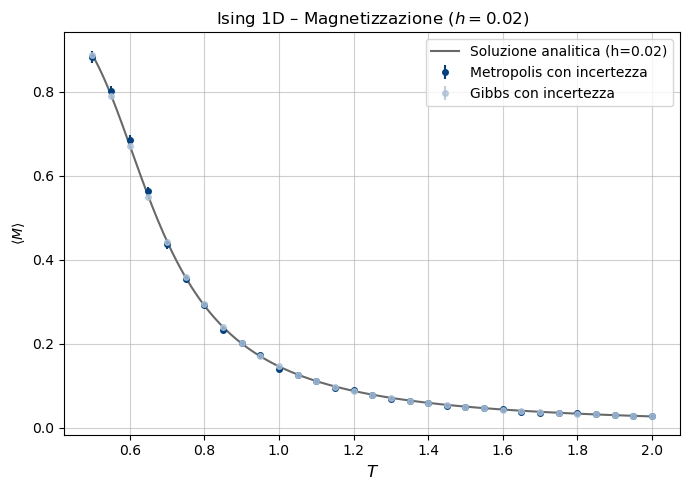

In [51]:
import numpy as np
import matplotlib.pyplot as plt

J, h, Ns = 1.0, 0.02, 50
points = 300  

def read_txt(file_path):
    return np.loadtxt(file_path, skiprows=1)[:, [0, 2, 3]].T

x, y, yerr = read_txt('OUTPUT_PLOT/METRO/magnetization.dat')
x1, y1, yerr1 = read_txt('OUTPUT_PLOT/GIBBS/magnetization.dat')

T = np.linspace(0.5, 2.0, points)
b = 1 / T
coshb = np.cosh(h / T)
sinh2J = np.sinh(2 * b * J)
sqrt_term = np.sqrt(np.exp(2 * b * J) * coshb**2 - 2 * sinh2J)

l1 = np.exp(b * J) * coshb + sqrt_term
l2 = np.exp(b * J) * coshb - sqrt_term
Z = l1**Ns + l2**Ns

num = np.exp(b * J) * np.sinh(b * h) * (
    l1**(Ns - 1) * (1 + np.exp(b * J) * coshb / sqrt_term) +
    l2**(Ns - 1) * (1 - np.exp(b * J) * coshb / sqrt_term)
)
M = num / Z 

plt.figure(figsize=(7, 5))
plt.plot(T, M, c='dimgray', lw=1.5, label='Soluzione analitica (h=0.02)')
plt.errorbar(x, y, yerr, fmt='o', ms=4, color='xkcd:darkish blue', label='Metropolis con incertezza')
plt.errorbar(x1, y1, yerr1, fmt='o', ms=4, color='xkcd:cloudy blue', label='Gibbs con incertezza', alpha = 0.8)
plt.xlabel(r'$T$', fontsize=12)
plt.ylabel(r'$\langle M \rangle$',)
plt.title('Ising 1D – Magnetizzazione ($h=0.02$)')
plt.grid(True, alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


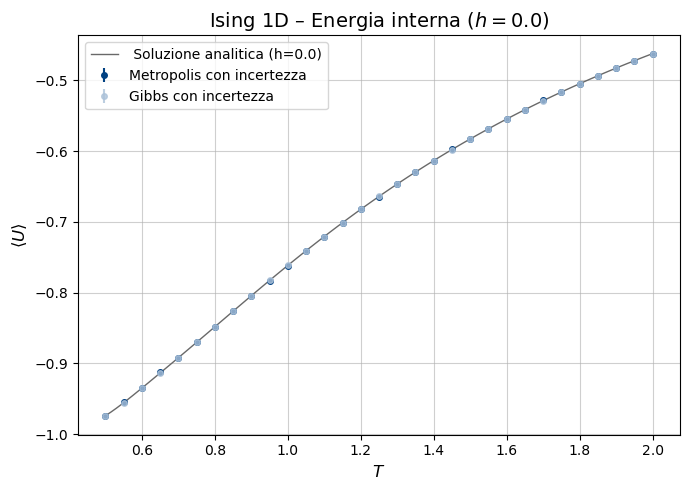

In [52]:
J, Ns, h = 1.0, 50, 0.02
points = 100

x, y, yerr = read_txt('OUTPUT_PLOT/METRO/total_energy.dat')
x1, y1, yerr1 = read_txt('OUTPUT_PLOT/GIBBS/total_energy.dat')

T = np.linspace(0.5, 2.0, points)
th = np.tanh(J / T)
thN, ch = th**Ns, 1 / th
e = -J * (th + ch * thN) / (1 + thN)

plt.figure(figsize=(7, 5))
plt.plot(T, e, color='dimgray', lw=1, label=' Soluzione analitica (h=0.0)')
plt.errorbar(x, y, yerr, fmt='o', ms=4, color='xkcd:darkish blue', label='Metropolis con incertezza')
plt.errorbar(x1, y1, yerr1, fmt='o', ms=4, color='xkcd:cloudy blue', label='Gibbs con incertezza', alpha=0.8)
plt.xlabel('$T$', fontsize=12); 
plt.ylabel(r'$\langle U \rangle$', fontsize=12)
plt.title('Ising 1D – Energia interna ($h=0.0$)', fontsize=14)
plt.grid(True, alpha=0.6); 
plt.legend(); 
plt.tight_layout(); 
plt.show()

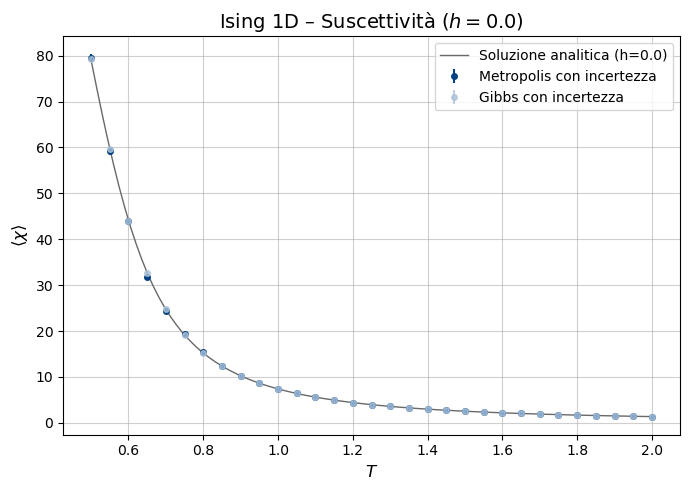

In [53]:
x, y, yerr = read_txt('OUTPUT_PLOT/METRO/susceptibility.dat')
x1, y1, yerr1 = read_txt('OUTPUT_PLOT/GIBBS/susceptibility.dat')

T = np.linspace(0.5, 2.0, points)
beta = 1 / T
th = np.tanh(J / T)
thN = th**Ns
X = beta * np.exp(2 * beta * J) * (1 - thN) / (1 + thN)

plt.figure(figsize=(7, 5))
plt.plot(T, X, c='dimgray', lw=1, label='Soluzione analitica (h=0.0)')
plt.errorbar(x, y, yerr, fmt='o', ms=4, c='xkcd:darkish blue', label='Metropolis con incertezza')
plt.errorbar(x1, y1, yerr1, fmt='o', ms=4, c='xkcd:cloudy blue', label='Gibbs con incertezza', alpha=0.8)
plt.xlabel('$T$', fontsize=12); 
plt.ylabel(r'$\langle \chi \rangle$', fontsize=12)
plt.title('Ising 1D – Suscettività ($h=0.0$)', fontsize=14)
plt.grid(True, alpha=0.6); 
plt.legend(); 
plt.tight_layout(); 
plt.show()


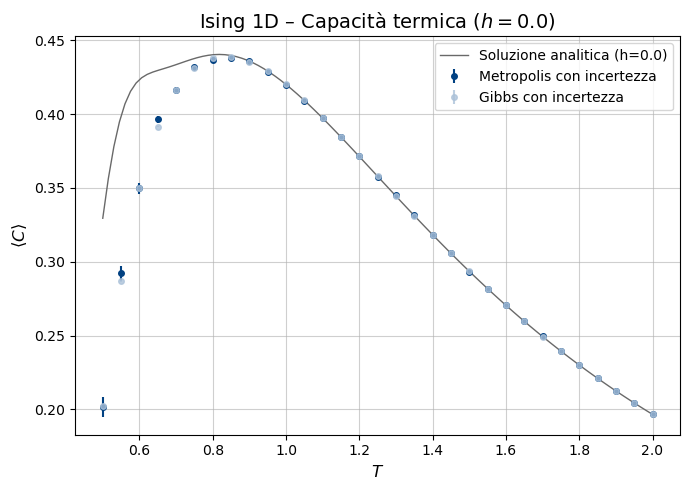

In [54]:
J, h, Ns, points = 1.0, 0.02, 50, 100
read_txt = lambda f: np.loadtxt(f, skiprows=1)[:, [0, 2, 3]].T
x, y, yerr = read_txt('OUTPUT_PLOT/METRO/specific_heat.dat')
x1, y1, yerr1 = read_txt('OUTPUT_PLOT/GIBBS/specific_heat.dat')

T = np.linspace(0.5, 2.0, points)
beta = 1 / T
th = np.tanh(J / T)
thN, ch = th**Ns, 1 / th

heat = (beta * J)**2 * (
    (1 + thN + (Ns - 1)*(th**2) + (Ns - 1)*(ch**2)*thN) / (1 + thN)
    - Ns * ( (th + ch*thN) / (1 + thN) )**2
)

plt.figure(figsize=(7, 5))
plt.plot(T, heat, color='dimgray', lw=1, label='Soluzione analitica (h=0.0)')
plt.errorbar(x, y, yerr, fmt='o', ms=4, color='xkcd:darkish blue', label='Metropolis con incertezza')
plt.errorbar(x1, y1, yerr1, fmt='o', ms=4, color='xkcd:cloudy blue', label='Gibbs con incertezza', alpha=0.8)
plt.xlabel('$T$', fontsize=12); 
plt.ylabel(r'$\langle C \rangle$', fontsize=12)
plt.title('Ising 1D – Capacità termica ($h=0.0$)', fontsize=14)
plt.grid(True, alpha=0.6); 
plt.legend(); 
plt.tight_layout(); 
plt.show()

Si noti che i risultati sono compatibili con le curve teoriche, ma nel caso del calore specifico il campionamento alle basse temperatura risulta meno accurato. Le mosse dell'algoritmo di Metropolis sono accettate con probabilità dominata dal peso di Boltzmann, il quale decresce esponenzialmente all'aumentare della temperatura. Ciò implica che la maggiore parte delle mosse che porterebbero il sistema ad uno stato di energia maggiore viene rigettata, lasciando il sistema congelato in una configurazione a energia. Dunque, lo spazio delle fasi non viene campionato correttamente.

Questo effetto si verifica solo nel caso della capacità termica poichè questa è calcolata come la varianza dell'energia (fluttuazione). Ma se il sistema è bloccato in uno stato di bassa energia, le fluttuazioni non sono più apprezzabili, facendo tendere erroneamente la capacità termica a zero.